In [1]:
import paddle
print(paddle.__version__)

2.6.1


In [2]:
import numpy
print(numpy.__version__)

1.21.6


[2024/07/09 03:50:08] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/korean/korean_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_tex

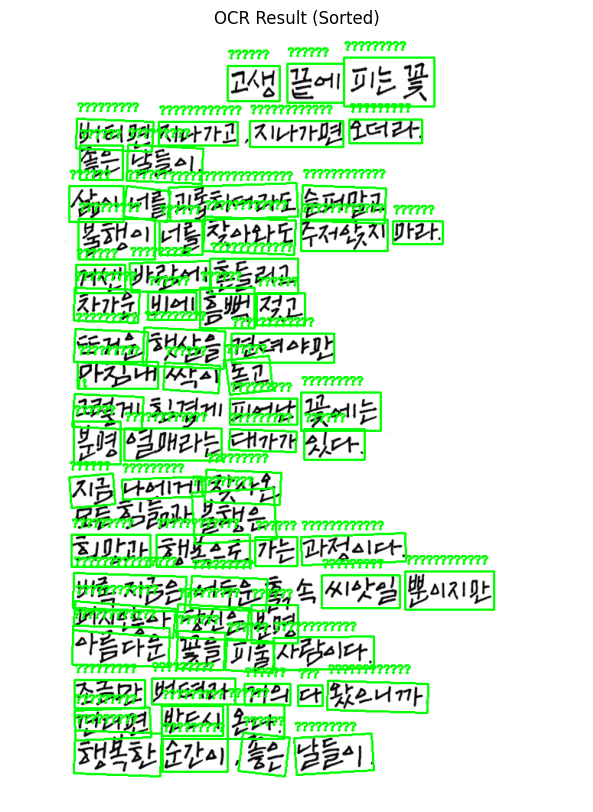

In [19]:
import paddleocr
import numpy as np
from matplotlib import pyplot as plt
import cv2


# PaddleOCR 모델 초기화 (CPU 모드)
ocr = paddleocr.PaddleOCR(use_angle_cls=True, 
                          lang='korean', 
                          det_model_dir='/root/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer',
                          rec_model_dir='/root/.paddleocr/whl/rec/korean/korean_PP-OCRv4_rec_infer',  
                          use_gpu=False)

# 이미지 파일 경로
image_path = 'ts_png.png'

# OCR 수행
result = ocr.ocr(image_path, cls=True)


# 결과 출력
for line in result[0]:
    print(line)



# 결과 시각화
image = cv2.imread(image_path)
for line in sorted_result:
    box = line[0]
    text = line[1][0]
    cv2.polylines(image, [np.array(box).astype(np.int32)], True, (0, 255, 0), 2)
    cv2.putText(image, text, (int(box[0][0]), int(box[0][1]) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('OCR Result (Sorted)')
plt.axis('off')
plt.show()


In [40]:
import paddleocr
import json

# PaddleOCR 리더 초기화 (모델 경로를 지정)
ocr = paddleocr.PaddleOCR(
    use_angle_cls=True, 
    lang='korean', 
    det_model_dir='/root/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer',
    rec_model_dir='/root/.paddleocr/whl/rec/korean/korean_PP-OCRv4_rec_infer'
)

# 이미지 파일 경로
img_path = 'ts_png.png'

# 이미지 읽기 및 OCR 수행
result = ocr.ocr(img_path, cls=True)

# 결과 출력
for line in result[0]:
    print(line)



paddle_ocr_results = []
for bounding_box, ocr_result in result[0]:

    text = ocr_result[0]
    probability = ocr_result[1]
    bottom_left = bounding_box[0]
    bottom_right = bounding_box[1]
    top_right = bounding_box[2]
    top_left = bounding_box[3]
    
    paddle_ocr_result = {
        "text": text,
        "probability": probability,
        "bounding_box": {
            "bottom_left": bottom_left,
            "bottom_right": bottom_right,
            "top_right": top_right,
            "top_left": top_left
        }
    }
    paddle_ocr_results.append(paddle_ocr_result)

# JSON convert
paddle_ocr_results_json = json.dumps(paddle_ocr_results, ensure_ascii=False, indent=4)

# JSON 출력
print(paddle_ocr_results_json)

[2024/07/09 04:29:25] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/korean/korean_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_tex

In [35]:
one_result = result[0][0]
print(one_result)
text = one_result[1][0]
probability = one_result[1][1]
bounding_box = one_result[0]
bottom_left = bounding_box[0]
bottom_right = bounding_box[1]
top_right = bounding_box[2]
top_left = bounding_box[3]

print(text)
print(probability)


print(bounding_box)
print(top_left)
print(top_right)
print(bottom_right)
print(bottom_left)


[[[362.0, 41.0], [436.0, 41.0], [436.0, 92.0], [362.0, 92.0]], ('끝에', 0.9998528957366943)]
끝에
0.9998528957366943
[[362.0, 41.0], [436.0, 41.0], [436.0, 92.0], [362.0, 92.0]]
[362.0, 92.0]
[436.0, 92.0]
[436.0, 41.0]
[362.0, 41.0]


[2024/07/09 04:00:06] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/korean/korean_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_tex

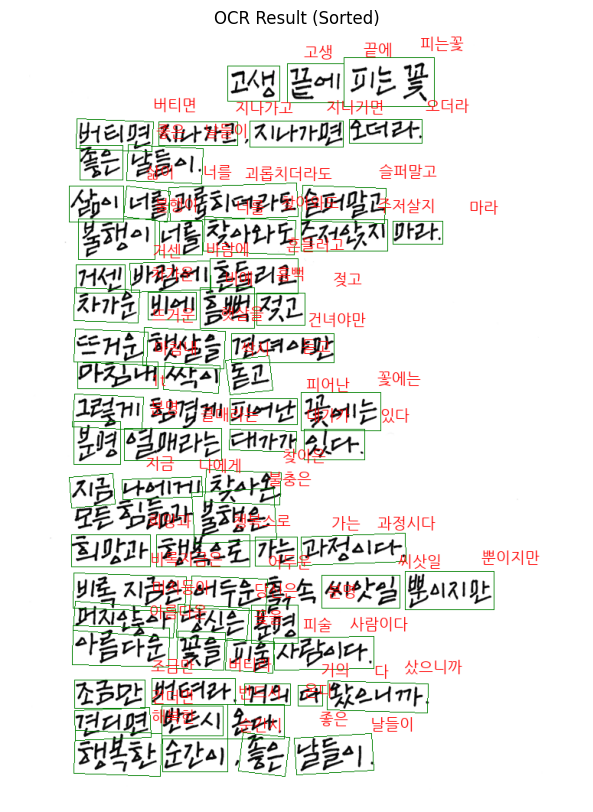

In [27]:
import paddleocr
import numpy as np
from matplotlib import pyplot as plt
import cv2
from PIL import Image, ImageDraw, ImageFont

# PaddleOCR 모델 초기화 (CPU 모드)
ocr = paddleocr.PaddleOCR(use_angle_cls=True, 
                          lang='korean', 
                          det_model_dir='/root/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer',
                          rec_model_dir='/root/.paddleocr/whl/rec/korean/korean_PP-OCRv4_rec_infer',  
                          use_gpu=False)

# 이미지 파일 경로
image_path = 'ts_png.png'

# OCR 수행
result = ocr.ocr(image_path, cls=True)

# 결과를 y좌표와 x좌표 기준으로 정렬하는 함수
def sort_by_coordinates(result):
    return sorted(result, key=lambda x: (np.mean([p[1] for p in x[0]]), min(p[0] for p in x[0])))

# 결과 정렬
sorted_result = sort_by_coordinates(result[0])

# 결과 출력
for line in sorted_result:
    print(line)

# 결과 시각화
image = Image.open(image_path).convert("RGB")
draw = ImageDraw.Draw(image)

# 한글 폰트를 사용하여 텍스트 표시 (예: 'NanumGothic.ttf' 폰트를 사용하는 경우)
font_path = 'NanumGothic.ttf'
font = ImageFont.truetype(font_path, 20)

# 텍스트 박스 및 인식 결과 표시
for line in sorted_result:
    box = line[0]
    text = line[1][0]
    draw.polygon([tuple(p) for p in box], outline="green")
    draw.text((box[0][0] + 100, box[0][1] -30), text, font=font, fill="red")

# 이미지 표시
plt.figure(figsize=(10, 10))
plt.imshow(np.array(image))
plt.title('OCR Result (Sorted)')
plt.axis('off')
plt.show()


In [1]:
import paddleocr
import numpy as np
from matplotlib import pyplot as plt
import cv2

# PaddleOCR 모델 초기화 (CPU 모드)
ocr = paddleocr.PaddleOCR(use_angle_cls=True, 
                          lang='korean', 
                          det_model_dir='/root/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer',
                          rec_model_dir='/root/.paddleocr/whl/rec/korean/korean_PP-OCRv4_rec_infer',  
                          use_gpu=False)

# 이미지 파일 경로
image_path = 'font_im.png'

# OCR 수행
result = ocr.ocr(image_path, cls=True)

# 인식된 텍스트와 신뢰도 출력
texts = []
confidences = []

for line in result[0]:
    text = line[1][0]
    confidence = line[1][1]
    texts.append(text)
    confidences.append(confidence)
    print(f"Text: {text}, Confidence: {confidence:.2f}")

# 전체적인 인식 정확도 계산 및 출력
average_confidence = np.mean(confidences)
print(f"Average Confidence: {average_confidence:.2f}")

# 전체 인식된 텍스트 출력
print("Recognized Texts:")
for text in texts:
    print(text)


download https://paddleocr.bj.bcebos.com/PP-OCRv3/multilingual/Multilingual_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer/Multilingual_PP-OCRv3_det_infer.tar
[2024/07/12 05:29:28] ppocr INFO: Path /root/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer/Multilingual_PP-OCRv3_det_infer.tar already exists. Skipping...
download https://paddleocr.bj.bcebos.com/PP-OCRv4/multilingual/korean_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/korean/korean_PP-OCRv4_rec_infer/korean_PP-OCRv4_rec_infer.tar
[2024/07/12 05:29:28] ppocr INFO: Path /root/.paddleocr/whl/rec/korean/korean_PP-OCRv4_rec_infer/korean_PP-OCRv4_rec_infer.tar already exists. Skipping...
download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:05<00:00, 375kiB/s] 

[2024/07/12 05:29:36] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/korean/korean_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_tex

[2024/07/12 05:29:37] ppocr DEBUG: dt_boxes num : 108, elapsed : 0.4660646915435791
[2024/07/12 05:29:38] ppocr DEBUG: cls num  : 108, elapsed : 0.7373661994934082
[2024/07/12 05:30:16] ppocr DEBUG: rec_res num  : 108, elapsed : 37.810235023498535
Text: 국가보훈부가지방자치단체에게, Confidence: 0.99
Text: 625전쟁, Confidence: 0.97
Text: 및, Confidence: 1.00
Text: 참전유공자의, Confidence: 1.00
Text: 참천수당, Confidence: 0.98
Text: 기준을, Confidence: 1.00
Text: 권고하는, Confidence: 1.00
Text: 개정안을, Confidence: 0.96
Text: 추진한, Confidence: 1.00
Text: 다, Confidence: 1.00
Text: 지자체별로, Confidence: 1.00
Text: 지급액이, Confidence: 1.00
Text: 려를, Confidence: 0.95
Text: 불거진, Confidence: 1.00
Text: 우유을, Confidence: 0.80
Text: 문제를, Confidence: 1.00
Text: 줄이기, Confidence: 1.00
Text: 위해서다, Confidence: 1.00
Text: 국가보훈부는, Confidence: 1.00
Text: 이, Confidence: 1.00
Text: 같은, Confidence: 1.00
Text: 내용을, Confidence: 1.00
Text: 담은, Confidence: 1.00
Text: 국가보훈기본법, Confidence: 1.00
Text: 개정안을, Confidence: 1.00
Text: 릅뭉, Confidence: 0.50
Tex